# TP n°1 du module 6 : Les algorithmes de classification pour le _Machine Learning_

Dans ce TP, nous allons mettre en pratique les principes de l'apprentissage supervisé.

## Objectifs :
- Savoir mettre en place les principaux algorithmes de classification
- Etudier l'impact de leurs paramètres sur leurs performances
- Comparer les performances de différents algorithmes

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
from sklearn.datasets import load_diabetes
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

## Question n°0
Commencez par charger à nouveau le jeu de données Titanic, à partir du csv généré dans le TP1 du module 4.
- Préparez les données d'entraînement et de test qui seront utilisées par la suite.

In [34]:
# Lambda nommée pour afficher un score en pourcentage avec un libellé (avec détail) :
pscore = lambda lib, score, detail='': print(F"{lib}{('',f" ({detail})")[len(str(detail))>0]} : {100*score:.2f}%")
titanic = pd.read_csv("Titanic.csv")
titanic

,Survived,Pclass,Age,Fare,FamilyMembers,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
0,0,3,22.00,7.2500,1,1.0,0.0,0.0,1.0,0.0
1,1,1,38.00,71.2833,1,0.0,1.0,0.0,0.0,0.0
2,1,3,26.00,7.9250,0,0.0,0.0,0.0,1.0,0.0
3,1,1,35.00,53.1000,1,0.0,0.0,0.0,1.0,0.0
4,0,3,35.00,8.0500,0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.00,13.0000,0,1.0,0.0,0.0,1.0,0.0
887,1,1,19.00,30.0000,0,0.0,0.0,0.0,1.0,0.0
888,0,3,21.75,23.4500,3,0.0,0.0,0.0,1.0,0.0
889,1,1,26.00,30.0000,0,1.0,1.0,0.0,0.0,0.0


## Partie 1 : découvrir Naive Bayes

### Question n°1
Commencez par créer un modèle basé sur Naive Bayes, sans changer les paramètres par défaut, en supposant que la répartition des données correspond à une Gaussienne (loi normale).
- Entraînez-le et testez-le.
- Quelle score (accuracy) obtenez-vous ?
- Que pouvez-vous dire de la précision et du rappel ?
- Comparez avec les scores obtenus sur les arbres de décision au module 5
- Avez-vous des hypothèses pour expliquer cette différence ?

In [78]:
X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


gnb = GaussianNB()

gnb.fit(X_train,y_train)

y_pred_gnb = gnb.predict(X_test)

accuracy_gnb = gnb.score(X_test, y_test)
pscore("Naive Bayes -> accuracy", accuracy_gnb)

precision_gnb = precision_score(y_test, y_pred_gnb, average='binary', pos_label=1)
pscore("Naive Bayes -> precision", precision_gnb)

rappel_gnb = recall_score(y_test, y_pred_gnb, average='binary', pos_label=1)
pscore("Naive Bayes -> rappel", rappel_gnb)

Naive Bayes -> accuracy : 67.04%
Naive Bayes -> precision : 78.95%
Naive Bayes -> rappel : 21.43%


#### Observations :
`à compléter`

### Question n°2
Affichez une matrice de corrélation des données du jeu d'entraînement, en y incluant un affichage textuel de la valeur de la corrélation.
- Voyez-vous des informations permettant d'expliquer les performance de l'algorithme _Naive Bayes_ ?

<Axes: >

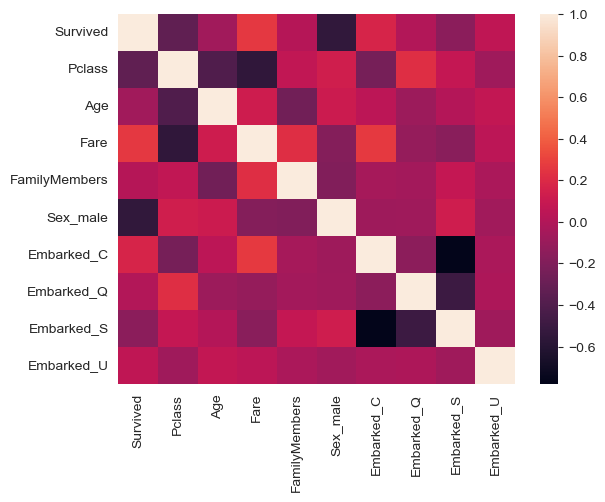

In [79]:
sns.heatmap(titanic.corr())


#### Observations :
`à compléter`

### Question n°3
Proposez une représentation graphique des attributs continus, permettant de vérifier l'hypothèse que nous avons faite, selon laquelle ces données suivent une loi normale (Gaussienne).

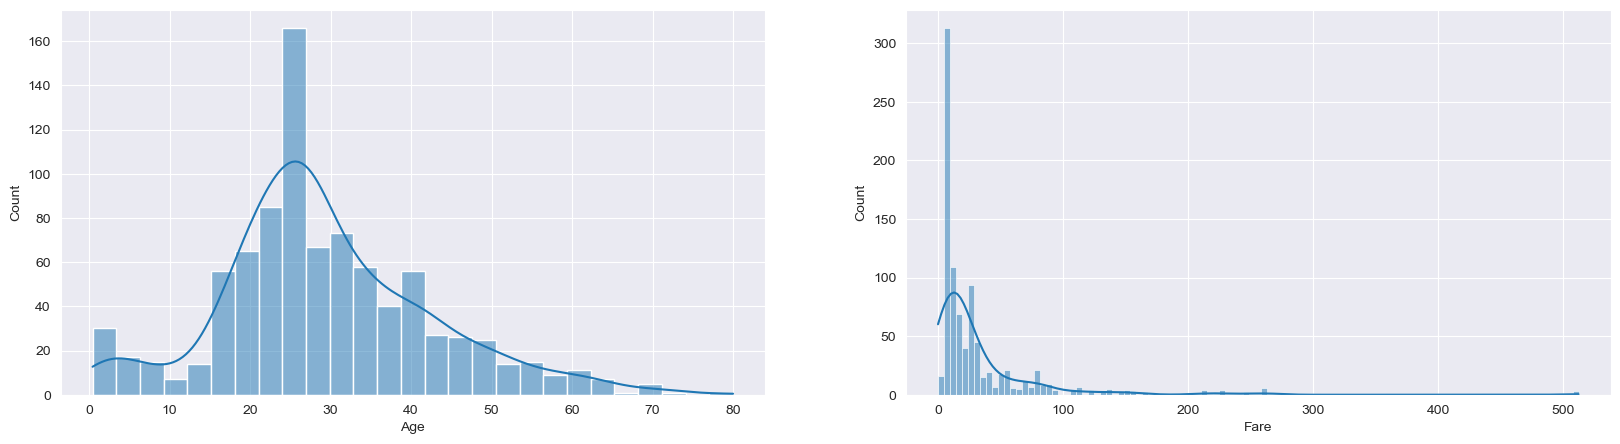

In [81]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
i=0
for c in ['Age', 'Fare']:
    sns.histplot(X, x=c, kde=True, ax =axes[i])
    i+=1

#### Observations :
`à compléter`

## Partie 2 : découvrir KNN

### Question n°1
Commencez par créer un modèle KNN, en gardant le nombre de voisins par défaut (à regarder dans la documentation).
- Que pouvez-vous dire de l'accuracy, de la précision et du rappel ?

In [59]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = knn.score(X_test, y_test)
pscore("Nearest Neighbors -> accuracy", accuracy_knn)

precision_knn = precision_score(y_test, y_pred_knn, average='binary', pos_label=1)
pscore("Nearest Neighbors -> precision", precision_knn)

rappel_knn = recall_score(y_test, y_pred_knn, average='binary', pos_label=1)
pscore("Nearest Neighbors -> rappel", rappel_knn)

Nearest Neighbors -> accuracy : 69.83%
Nearest Neighbors -> precision : 63.93%
Nearest Neighbors -> rappel : 54.93%


#### Observations :
`à compléter`

### Question n°2
Nous allons maintenant observer l'impact du nombre de voisins à prendre en considération.
- Faite varier k entre 1 et 20.
- Calculez à chaque fois accuracy, précision, et rappel.
- Tracez l'évolution de ces trois scores en fonction de k, sur un même graphique.
- Que constatez-vous ?
- Affichez la valeur de k pour laquelle l'accuracy est la plus élevée.

Nearest Neighbors 1 -> accuracy : 74.30%
Nearest Neighbors 1 -> precision : 64.71%
Nearest Neighbors 1 -> rappel : 54.10%
Nearest Neighbors 2 -> accuracy : 69.27%
Nearest Neighbors 2 -> precision : 60.00%
Nearest Neighbors 2 -> rappel : 29.51%
Nearest Neighbors 3 -> accuracy : 71.51%
Nearest Neighbors 3 -> precision : 57.81%
Nearest Neighbors 3 -> rappel : 60.66%
Nearest Neighbors 4 -> accuracy : 73.18%
Nearest Neighbors 4 -> precision : 62.75%
Nearest Neighbors 4 -> rappel : 52.46%
Nearest Neighbors 5 -> accuracy : 70.95%
Nearest Neighbors 5 -> precision : 57.14%
Nearest Neighbors 5 -> rappel : 59.02%
Nearest Neighbors 6 -> accuracy : 74.86%
Nearest Neighbors 6 -> precision : 66.00%
Nearest Neighbors 6 -> rappel : 54.10%
Nearest Neighbors 7 -> accuracy : 72.63%
Nearest Neighbors 7 -> precision : 60.34%
Nearest Neighbors 7 -> rappel : 57.38%
Nearest Neighbors 8 -> accuracy : 74.30%
Nearest Neighbors 8 -> precision : 65.96%
Nearest Neighbors 8 -> rappel : 50.82%
Nearest Neighbors 9 -> a

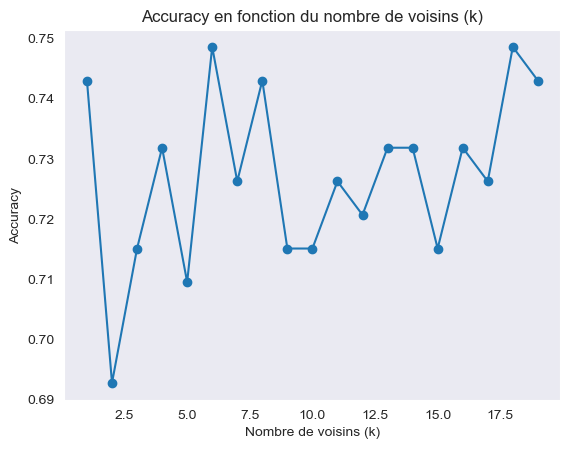

In [71]:
knn_max_accuracy = 0
knn_neighbors = 0
accuracies = []
neighbors_range = range(1, 20)

for i in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)

    accuracy_knn = knn.score(X_test, y_test)
    pscore(f"Nearest Neighbors {i} -> accuracy", accuracy_knn)

    precision_knn = precision_score(y_test, y_pred_knn, average='binary', pos_label=1)
    pscore(f"Nearest Neighbors {i} -> precision", precision_knn)

    rappel_knn = recall_score(y_test, y_pred_knn, average='binary', pos_label=1)
    pscore(f"Nearest Neighbors {i} -> rappel", rappel_knn)

    knn_neighbors = i if accuracy_knn > knn_max_accuracy else knn_neighbors
    knn_max_accuracy = accuracy_knn if accuracy_knn > knn_max_accuracy else knn_max_accuracy

    accuracies.append(accuracy_knn)
print(f"knn max accuracy = {knn_max_accuracy}, neighbors = {knn_neighbors}")

plt.plot(neighbors_range, accuracies, marker='o')
plt.title('Accuracy en fonction du nombre de voisins (k)')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

#### Observations :
`à compléter`

### Question n°3
En prenant la valeur de _k_ qui vous semble la plus pertinente, faite varier la dimension (p) utilisée pour calculer la distance de Minkowski entre 2 données.
- Cette distance a-t'elle un fort impact sur les résultats d'accuracy obtenus ?
- Montrez-le en montrant l'évolution de ce score en fonction de _p_<br/> (faire varier entre 1 et 10).
- Ajoutez également la précision et le rappel.

Nearest Neighbors 1 -> accuracy : 74.30%
Nearest Neighbors 1 -> precision : 65.31%
Nearest Neighbors 1 -> rappel : 52.46%
Nearest Neighbors 2 -> accuracy : 74.86%
Nearest Neighbors 2 -> precision : 66.00%
Nearest Neighbors 2 -> rappel : 54.10%
Nearest Neighbors 3 -> accuracy : 72.63%
Nearest Neighbors 3 -> precision : 62.00%
Nearest Neighbors 3 -> rappel : 50.82%
Nearest Neighbors 4 -> accuracy : 71.51%
Nearest Neighbors 4 -> precision : 59.62%
Nearest Neighbors 4 -> rappel : 50.82%
Nearest Neighbors 5 -> accuracy : 70.95%
Nearest Neighbors 5 -> precision : 58.49%
Nearest Neighbors 5 -> rappel : 50.82%
Nearest Neighbors 6 -> accuracy : 71.51%
Nearest Neighbors 6 -> precision : 59.62%
Nearest Neighbors 6 -> rappel : 50.82%
Nearest Neighbors 7 -> accuracy : 71.51%
Nearest Neighbors 7 -> precision : 59.62%
Nearest Neighbors 7 -> rappel : 50.82%
Nearest Neighbors 8 -> accuracy : 71.51%
Nearest Neighbors 8 -> precision : 59.62%
Nearest Neighbors 8 -> rappel : 50.82%
Nearest Neighbors 9 -> a

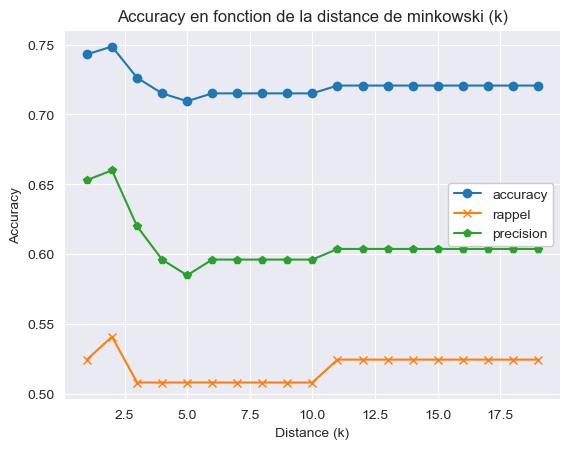

In [76]:
knn_max_accuracy = 0
knn_distance = 0
accuracies = []
rappels = []
precisions = []

minkwoski_range = range(1, 10)

for i in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=i)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)

    accuracy_knn = knn.score(X_test, y_test)
    pscore(f"Nearest Neighbors {i} -> accuracy", accuracy_knn)

    precision_knn = precision_score(y_test, y_pred_knn, average='binary', pos_label=1)
    pscore(f"Nearest Neighbors {i} -> precision", precision_knn)

    rappel_knn = recall_score(y_test, y_pred_knn, average='binary', pos_label=1)
    pscore(f"Nearest Neighbors {i} -> rappel", rappel_knn)

    knn_neighbors = i if accuracy_knn > knn_max_accuracy else knn_neighbors
    knn_max_accuracy = accuracy_knn if accuracy_knn > knn_max_accuracy else knn_max_accuracy

    accuracies.append(accuracy_knn)
    rappels.append(rappel_knn)
    precisions.append(precision_knn)

print(f"knn max accuracy = {knn_max_accuracy}, distance = {knn_neighbors}")

plt.plot(neighbors_range, accuracies, marker='o', label='accuracy')
plt.plot(neighbors_range, rappels, marker='x', label='rappel')
plt.plot(neighbors_range, precisions, marker='p', label='precision')


plt.title('Accuracy en fonction de la distance de minkowski (k)')
plt.xlabel('Distance (k)')
plt.ylabel('Accuracy')
plt.legend(loc='best', facecolor='white', framealpha=1)
plt.grid(True)
plt.show()

#### Observations :
`à compléter`

## Partie 3 : découvrir les SVM

### Question n°1
Créez un modèle de classification basée sur les machines à vecteur de support.
- Dans un premier temps, gardez les options par défaut.
- Que pouvez-vous dire des performances obtenues (accuracy, précision, rappel) ?

In [58]:
svm = SVC()

svm.fit(X_train, y_train)



y_pred_svm = svm.predict(X_test)

accuracy_svm = svm.score(X_test, y_test)
pscore("vecteur de support -> accuracy", accuracy_svm)

precision_svm = precision_score(y_test, y_pred_svm, average='binary', pos_label=1)
pscore("vecteur de support -> precision", precision_svm)

rappel_svm = recall_score(y_test, y_pred_svm, average='binary', pos_label=1)
pscore("vecteur de support -> rappel", rappel_svm)

vecteur de support -> accuracy : 66.48%
vecteur de support -> precision : 64.10%
vecteur de support -> rappel : 35.21%


#### Observations :
`à compléter`

### Question n°2
Testez les différents noyaux disponibles pour l'algorithme SVM (linéaire, polynomial, rbf et sigmoïde).
- Représentez graphiquement l'accuracy, la précision et le rappel, pour chaque noyau.
- Il y en a t'il un qui semble plus pertinent que les autres ?
- Affichez-le, ainsi que les scores obtenus pour ce noyau.

In [42]:
#TODO

### Question n°3
Nous allons essayer d'améliorer les performances obtenues avec le noyau polynomial.
- Utilisez ce noyau (`poly`), et faites varier le degré du polynôme utilisé de 1 à 10.
- Représentez graphiquement l'accuracy, la précision et le rappel, en fonction du degré du polynôme.
- Il y en a-t-il un qui semble plus pertinent que les autres ?
- Affichez-le, ainsi que les scores obtenus pour cette valeur.
- Comparez avec le meilleur score obtenu à la question précédente.

In [43]:
#TODO

## Partie 4 : découvrir les réseaux de neurones (ANN)

### Question n°1
Commençons par étudier le réseau le plus simple : un _perceptron_.
- À l'aide de la classe `sklearn.linear_model.Perceptron`,<br/> créez un perceptron, en gardant les options par défaut.
- Affichez `accuracy`, `précision` et `rappel` : Que pensez-vous de ces performances ?

In [57]:
ann = MLPClassifier(max_iter=1000)

ann.fit(X_train, y_train)

y_pred_ann = ann.predict(X_test)

accuracy_ann = ann.score(X_test, y_test)
pscore("réseau de neurone -> accuracy", accuracy_ann)

precision_ann = precision_score(y_test, y_pred_ann, average='binary', pos_label=1)
pscore("réseau de neurone -> precision", precision_ann)

rappel_ann = recall_score(y_test, y_pred_ann, average='binary', pos_label=1)
pscore("réseau de neurone -> rappel", rappel_ann)

réseau de neurone -> accuracy : 79.89%
réseau de neurone -> precision : 74.65%
réseau de neurone -> rappel : 74.65%


#### Observation :
`à compléter`

### Question n°2
Regardez la documentation pour créer un réseau de neurones (`sklearn.neural_network.MLPClassifier`) :
- Quelle est la structure d'un réseau de neurones par défaut avec scikit-learn ?
- Combien de couches cachées ?
- Combien de neurones par couche ?

_N.B. : Un message d'alerte (⚠Warning: Stochastic Optimizer: Maximum iterations) est suceptible d'apparaître._

#### Réponse :
`à compléter`

### Question n°3
- Créer un réseau de neurones, en gardant ces options par défaut.
- Affichez `accuracy`, `précision` et `rappel` :
    - Que pensez-vous de ces performances, notamment en comparant par rapport au perceptron ?
    - Avez-vous un message d'alerte ?<br/>(⚠Warning: Stochastic Optimizer: Maximum iterations)

In [45]:
#TODO

#### Observation :
`à compléter`

### Question n°4
Si vous avez observé un message d'alerte sur la question précédent :
- Que signifie-t'il selon vous ?
- Que pouvez-vous faire pour y remédier ?
- Proposez un code permettant d'obtenir des résultats, sans message d'alerte.
- Qu'observez-vous sur l'évolution des scores ?

In [46]:
#TODO

#### Observation :
`à compléter`

### Question n°5
Nous allons à présent comparer différentes architectures du réseau de neurones :
- 3 couches de 50 neurones chacune
- 5 couches de 50 neurones chacune
- 3 couches :
    1. 50 neurones,
    2. 100 neurones,
    3. 50 neurones
- 5 couches :
    1. 50 neurones,
    2. 100 neurones,
    3. 50 neurones,
    4. 100 neurones,
    5. 50 neurones

**Les attendus :**
- Représentez graphiquement l'_accuracy_, la _précision_ et le _rappel_, pour chaque architecture.
- Il y en a t'il une qui semble plus pertinente que les autres ?
- Affichez-la, ainsi que les scores obtenus pour cette architecture.
- Comparez avec le score obtenu par l'architecture par défaut.
- Votre code ne doit générer aucun message d'alerte.

In [47]:
#TODO

### Question n°6
En utilisant l'architecture qui vous donnait les meilleures performances, étudier l'impact de la fonction d'activation utilisée sur les performances.
- Représentez sur un graphiques les scores (accuracy, précision et rappel) obtenus pour les quatres fonctions d'activation proposées par _Scikit-Learn_.
- Affichez la fonction qui vous parait la plus pertinente, ainsi que les scores associés.

In [48]:
#TODO

## Partie 5 : comparer les performances des différents algorithmes

Nous allons à présent résumer les différentes performances des algorithmes que vous avez testé dans ce TP :
- Récupérez les meilleurs scores (accuracy) obtenu pour chaque algorithme.
- Représentez-les sur un diagramme en barres, en regroupant par algorithme, et en représentant chaque score par une couleur.
- Un algorithme semble-t'il obtenir de meilleures performances que les autres ?

In [49]:
#TODO

## Partie 6 : optimiser la recherche des paramètres optimaux

Dans ce TP, nous avons souvent cherché à identifier la meilleur combinaison de paramètres. Nous avons procédé par itération, en cherchant à fixer un paramètre avant de faire évoluer les autres. Cette méthode est coûteuse, et pour faire une recherche exhaustive, nécessite, de répéter très souvent le même code. Scikit-learn propose une classe, `sklearn.model_selection.GridSearchCV`, qui va permettre d'optimiser cette recherche de paramétrage optimal.

_Lien vers la documentation :_ [sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Le principe est de définir un dictionnaire, où la clé correspond à un paramètre, et la valeur à la liste de valeurs possibles à tester pour le paramètre considéré. 

### Consigne :
Appliquez ce principe pour déterminer la meilleure combinaison possible pour le réseau de neurones, en repartant des différentes configurations testées dans les parties précédentes.

In [50]:
#TODO

In [51]:
#TODO

# Fin du TP !